In [2]:
import pandas as pd 
import numpy as np
# VISUALISATION LIBRARIES
import matplotlib.pyplot as plt
import seaborn as sns

# MODEL EVALUATION
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve

# SUPPRESS WARNINGS
import warnings
warnings.filterwarnings('ignore')

sns.set_theme(style="darkgrid")


### STEP -1 IMPORTING DATA

In [3]:
df = pd.read_csv (r"C:\Users\puja0\Downloads\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
df.shape


(9240, 37)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
pd.set_option('display.max_columns', None)

### STEP-3 : DATA PREPROCESSING

In [8]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [9]:
df=df.replace('select',np.nan)

In [10]:
round((df.isnull().sum()/df.shape[0]) * 100, 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [11]:
df.drop(['Lead Profile', 'How did you hear about X Education'], axis=1, inplace=True)

df.drop(['Get updates on DM Content',
         'Update me on Supply Chain Content',
         'I agree to pay the amount through cheque',
         'Receive More Updates About Our Courses'], axis=1, inplace=True)

df.drop(['Asymmetrique Activity Index',
         'Asymmetrique Profile Index',                     
         'Asymmetrique Activity Score',                   
         'Asymmetrique Profile Score'], axis=1, inplace=True)

         

In [12]:
df.head(2)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Quality,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,Select,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Ringing,NaN,Select,No,Email Opened


In [13]:
df['Specialization']=df['Specialization'].replace(np.nan,'Other Specialization')

Replaceing all NaN Values in city with 'Mumbai' in 'What is your current occupation' with 'Unemployed', in 'what matters most to yuo in choosing a course' with 'better career prospects' in 'country with 'india ' and in  'tags' with 'will revert after  reading the mail', ensuring completeness and maintaining consistency in the dataset.

In [14]:
df['City'].value_counts()

City
Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

In [15]:
df['City']=df['City'].replace(np.nan,'Mumbai')

In [16]:
df['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [17]:
df['What is your current occupation']=df['What is your current occupation']. replace(np.nan, 'Unemployes')

In [18]:
df['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [19]:
df['What matters most to you in choosing a course']=df['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

In [20]:
df['Country'].value_counts()

Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

In [21]:
# IMPUTING NULL VALUE IN 'country' WITH 'india '
df['Country']=df['Country'].replace(np.nan,'India')

In [22]:
df['Tags'].value_counts()

Tags
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to O

In [23]:
# REPLACE NULL VALUES IN 'Tags' will revert after reading the email'
df['Tags']=df['Tags'].replace(np.nan,'Will revert after reading the email')

In [24]:
df['Lead Quality'].value_counts()

Lead Quality
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: count, dtype: int64

In [25]:
# as the lead quality depend upon the employee it's better to replace null value with 'not sure'
df['Lead Quality']=df['Lead Quality'].replace(np.nan,'Not sure')

In [26]:
df.isnull().sum()

Prospect ID                                        0
Lead Number                                        0
Lead Origin                                        0
Lead Source                                       36
Do Not Email                                       0
Do Not Call                                        0
Converted                                          0
TotalVisits                                      137
Total Time Spent on Website                        0
Page Views Per Visit                             137
Last Activity                                    103
Country                                            0
Specialization                                     0
What is your current occupation                    0
What matters most to you in choosing a course      0
Search                                             0
Magazine                                           0
Newspaper Article                                  0
X Education Forums                            

In [27]:
# Remaining Null value are less than 2% hence these rows can be directly dropped 

In [28]:
df.dropna(inplace=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9074 non-null   object 
 1   Lead Number                                    9074 non-null   int64  
 2   Lead Origin                                    9074 non-null   object 
 3   Lead Source                                    9074 non-null   object 
 4   Do Not Email                                   9074 non-null   object 
 5   Do Not Call                                    9074 non-null   object 
 6   Converted                                      9074 non-null   int64  
 7   TotalVisits                                    9074 non-null   float64
 8   Total Time Spent on Website                    9074 non-null   int64  
 9   Page Views Per Visit                           9074 non-n

### CORRECT DATA TYPE 

In [30]:
df['TotalVisits']=df['TotalVisits'].astype(int)

In [31]:
df.head(2)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Quality,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0,0,0.0,Page Visited on Website,India,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,Select,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5,674,2.5,Email Opened,India,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Ringing,Not sure,Select,No,Email Opened


0.4 STEP-4 : EXPLORATORY DATA ANALYSIS

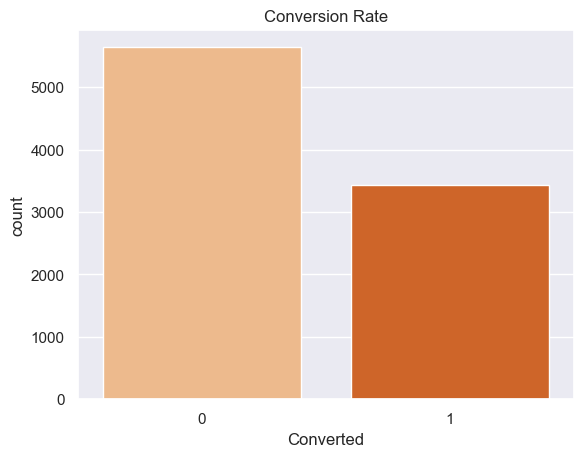

In [32]:
sns.countplot(data=df,x='Converted',palette='Oranges')
plt.title('Conversion Rate')
plt.show()

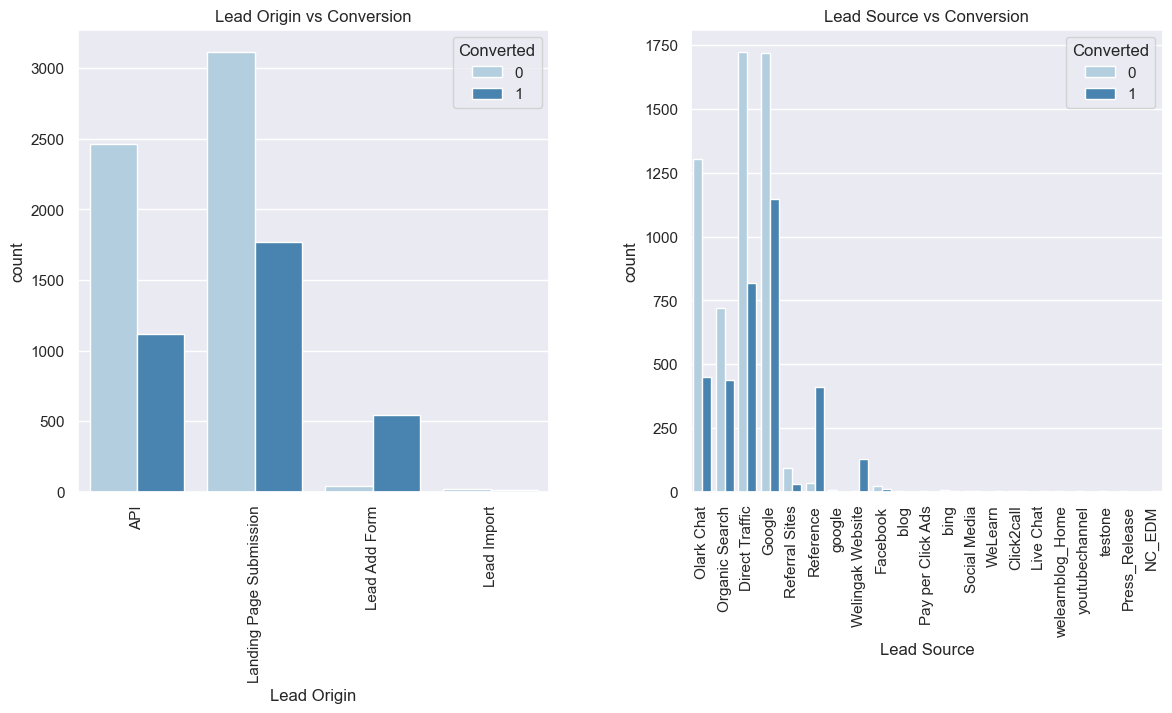

In [33]:
plt.figure(figsize=(14, 6)) # Wider figure for side-by-side plots
# First subplot (Left) - Lead Origin
plt.subplot(1, 2, 1)
sns.countplot(x='Lead Origin', data=df, hue='Converted',palette='Blues')
plt.xticks(rotation=90)
plt.title('Lead Origin vs Conversion')
# Second subplot (Right) - Lead Source
plt.subplot(1, 2, 2)
sns.countplot(x='Lead Source', data=df, hue='Converted',palette='Blues')
#Ensure correct column name
plt.xticks(rotation=90)
plt.title('Lead Source vs Conversion')
plt.subplots_adjust(wspace=0.3) # Add space between the subplots
plt.show()


0.4.1 OBSERVATION:


• API and Landing Page Submission have a low conversion rate (~30%), but the number of leads from these sources is significant.

• Lead Add Form has a low lead count but a high conversion rate, indicating its effectiveness in generating quality leads.

• Lead Import has a very low lead count and a low conversion rate, making it less impactful and can be ignored.

In [34]:
# We can clearly observe that the count of leads from various sources are close to negligible
# and hence we can club them into "Others" for better visualization and analysis
df['Lead Source'] = df['Lead Source'].replace(
['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home','youtubechannel'],
'Other_Lead_Source'
)
df['Lead Source'] = df['Lead Source'].replace("google", "Google")

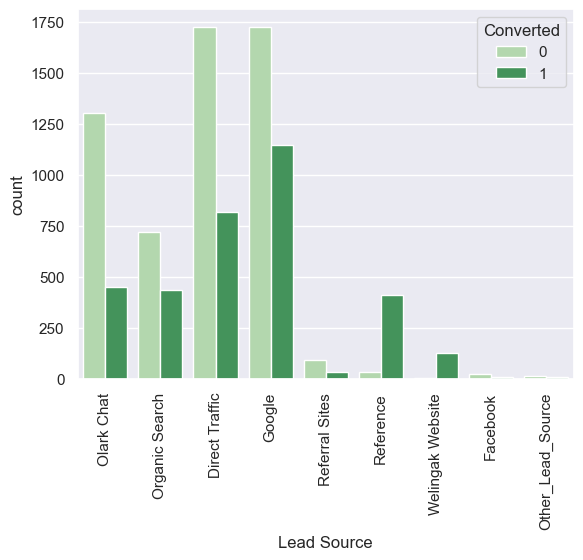

In [35]:
sns.countplot(x='Lead Source',data=df,hue='Converted',palette='Greens')
plt.xticks(rotation=90)
plt.show()


Observation (0.4.2):

Google and Direct Traffic contribute the highest number of leads.

Reference and the Welingak Website have the highest conversion rates.

To enhance the overall lead conversion rate, focus should be placed on improving the conversion rates of Google, Olark Chat, Organic Search, and Direct Traffic. Additionally, efforts should be made to increase the number of leads generated from Reference and the Welingak Website.


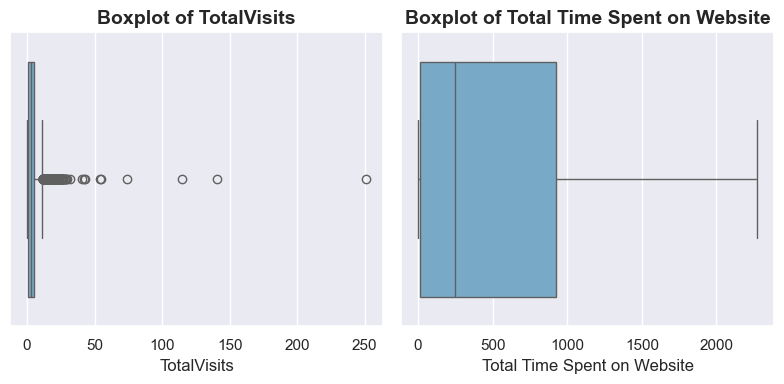

In [36]:
# Define the features to plot
features = ['TotalVisits', 'Total Time Spent on Website']
# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
# Loop through features and plot boxplots
for i, feature in enumerate(features):
    sns.boxplot(x=df[feature], ax=axes[i], color="skyblue",palette='Blues')
    axes[i].set_title(f'Boxplot of {feature}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel(feature, fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

In [37]:
# Calculate Q1, Q3, and IQR
Q1 = df['TotalVisits'].quantile(0.25)
Q3 = df['TotalVisits'].quantile(0.75)
IQR = Q3 - Q1
# Compute Upper Cap
upper_cap = Q3 + 1.5 * IQR
# Replace values greater than the upper cap with the upper cap using np.where
df['TotalVisits'] = np.where(df['TotalVisits'] > upper_cap, upper_cap,
                             df['TotalVisits'])

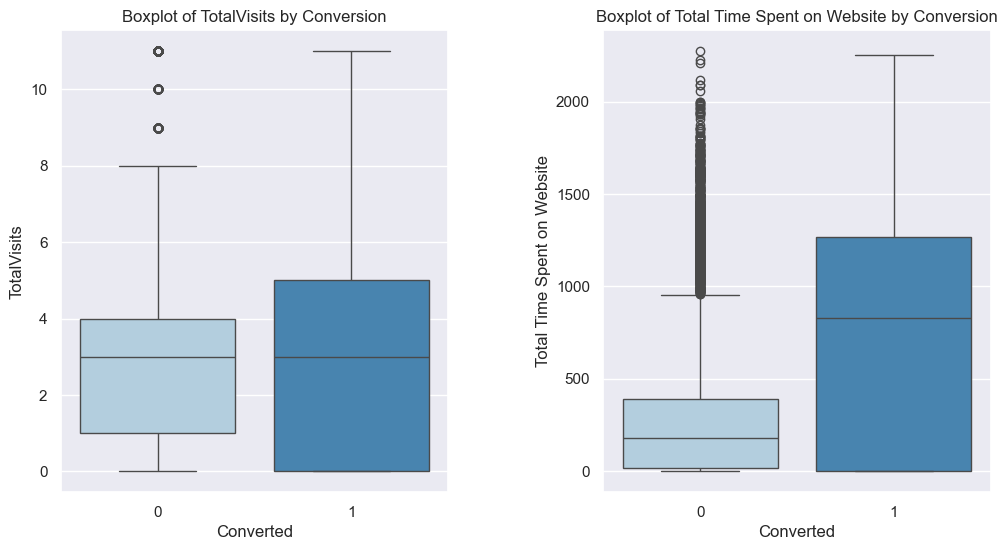

In [38]:
plt.figure(figsize=(12, 6))

features = ["TotalVisits", "Total Time Spent on Website"]

for i, feature in enumerate(features):
    plt.subplot(1, 2, i + 1)  # 1 row, 2 columns
    sns.boxplot(y=feature, x='Converted', data=df, palette='Blues')
    plt.title(f'Boxplot of {feature} by Conversion')

# Adjust spacing
plt.subplots_adjust(wspace=0.4)  # Adjust space between subplots

plt.show()

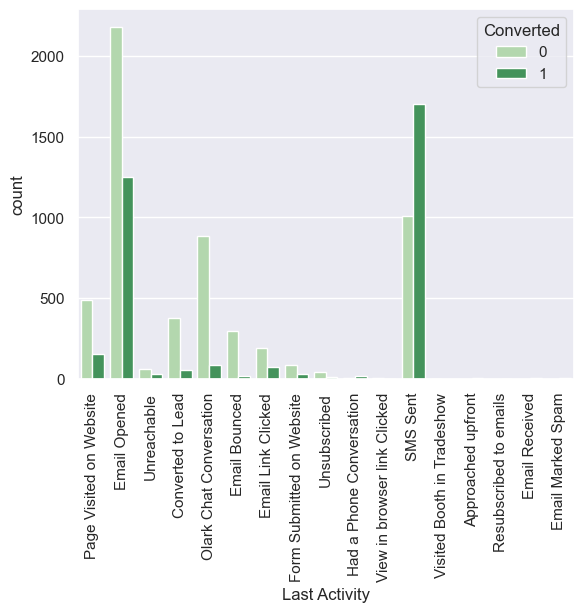

In [39]:
# Plotting the Last Activity again
sns.countplot(x="Last Activity", hue="Converted", data=df,palette='Greens')
plt.xticks(rotation='vertical')
plt.show()


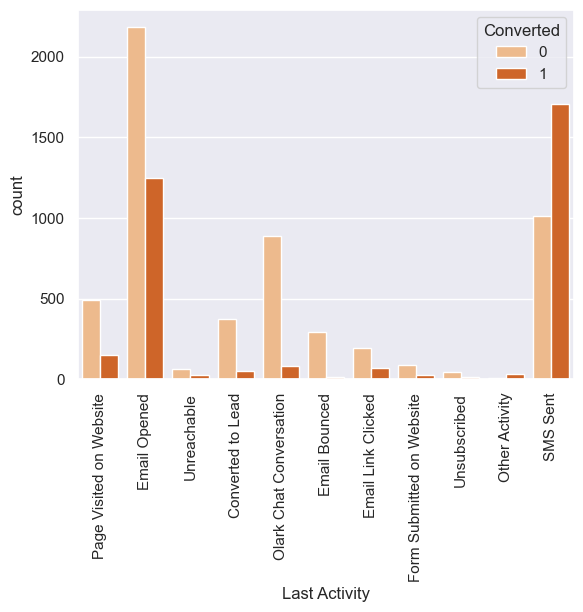

In [40]:
# Converting low-count categories to 'Other Activity'
df['Last Activity'] = df['Last Activity'].replace(
    ['Had a Phone Conversation', 'View in browser link Clicked', 
     'Visited Booth in Tradeshow', 'Approached upfront', 
     'Resubscribed to emails', 'Email Received', 'Email Marked Spam'], 
    'Other Activity'
)

# Rotate x-axis labels for better readability
sns.countplot(x="Last Activity", hue="Converted", data= df,palette='Oranges')
plt.xticks( rotation='vertical')


# Show plot
plt.show()

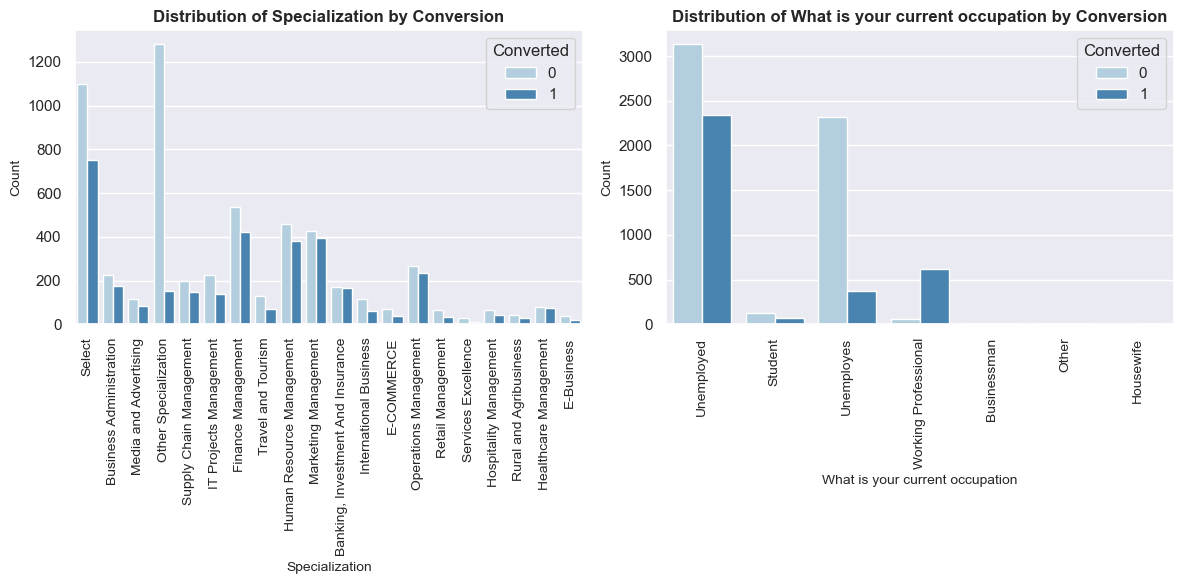

In [41]:
# Define the features
features = ["Specialization", "What is your current occupation"]

# Create subplots: 1 row, 2 columns with a suitable figure size
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Loop through each feature and create a countplot
for i, feature in enumerate(features):
    sns.countplot(x=feature, hue="Converted", data=df, palette="Blues", ax=axes[i])  # Fixed color
    axes[i].set_title(f"Distribution of {feature} by Conversion", fontsize=12, fontweight="bold")
    axes[i].tick_params(axis='x', rotation=90, labelsize=10)
    axes[i].set_xlabel(feature, fontsize=10)  # Fixed xlabel
    axes[i].set_ylabel("Count", fontsize=10)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

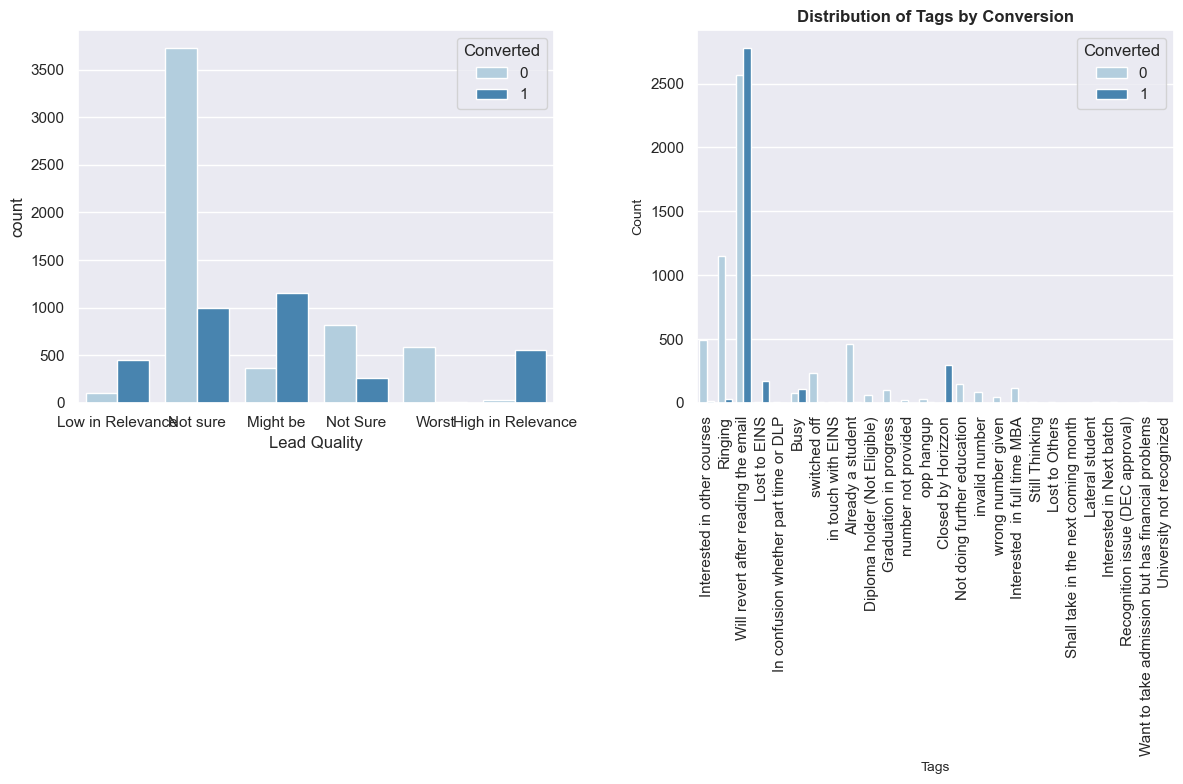

In [42]:
# Define figure and subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 8))
# Define features
features = ["Lead Quality", "Tags"]
# Loop through each feature and create a countplot
for i, feature in enumerate(features):
    sns.countplot(x=feature, hue="Converted", data=df, ax=axes[i],palette="Blues") # Added Blues palette
axes[i].tick_params(axis='x', rotation=90) # Rotate x-axis labels
axes[i].set_title(f"Distribution of {feature} by Conversion", fontsize=12,fontweight="bold")
axes[i].set_xlabel(feature, fontsize=10)
axes[i].set_ylabel("Count", fontsize=10)
# Adjust layout to prevent overlap
plt.tight_layout()
plt.subplots_adjust(wspace=0.3, hspace=0.5) # Adjust spacing between subplots
plt.show()


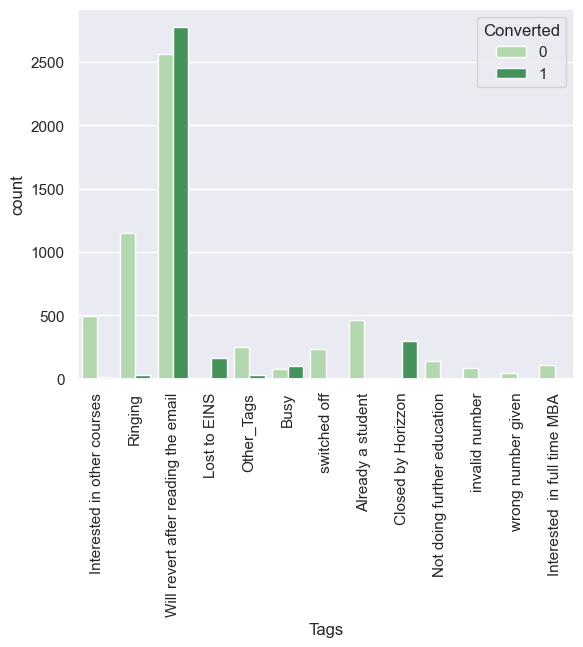

In [43]:
# Converting all low-count categories to 'Other_Tags'
df['Tags'] = df['Tags'].replace([
    'In confusion whether part time or DLP', 'in touch with EINS',
    'Diploma holder (Not Eligible)', 'Approached upfront',
    'Graduation in progress', 'number not provided', 'opp hangup',
    'Still Thinking', 'Lost to Others', 'Shall take in the next coming month',
    'Lateral student', 'Interested in Next batch',
    'Recognition issue (DEC approval)',
    'Want to take admission but has financial problems',
    'University not recognized'
], 'Other_Tags')

# Plot the updated 'Tags' distribution
sns.countplot(x="Tags", hue="Converted", data=df, palette='Greens')
plt.xticks(rotation=90)  # Ensures proper rotation for readability
plt.show()

In [44]:
# Dropping unnecessary columns
df = df.drop(['Lead Number','What matters most to you in choosing a course','Search','Magazine',
'Newspaper Article','X Education Forums','Newspaper',
'Digital Advertisement','Through Recommendations',
'A free copy of Mastering The Interview','Country','Do Not Call'],axis=1)
df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,Interested in other courses,Low in Relevance,Select,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,Ringing,Not sure,Select,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   object 
 4   Converted                        9074 non-null   int64  
 5   TotalVisits                      9074 non-null   float64
 6   Total Time Spent on Website      9074 non-null   int64  
 7   Page Views Per Visit             9074 non-null   float64
 8   Last Activity                    9074 non-null   object 
 9   Specialization                   9074 non-null   object 
 10  What is your current occupation  9074 non-null   object 
 11  Tags                             9074 non-null   object 
 12  Lead Quality             

# 0.4.8 STEP 5: FEATURE SCALING

In [46]:
scaler = StandardScaler()
df[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']]=scaler.fit_transform(df[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])


In [47]:
df['Do Not Email']=df['Do Not Email'].apply(lambda x: 0 if x=='No' else 1)


In [48]:
df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,-1.121546,-0.885664,-1.096911,Page Visited on Website,Select,Unemployed,Interested in other courses,Low in Relevance,Select,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0.614180,0.350519,0.060094,Email Opened,Select,Unemployed,Ringing,Not sure,Select,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,1,-0.427256,1.924177,-0.171307,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,-0.774401,-0.326263,-0.634109,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,1,-0.427256,1.733431,-0.634109,Converted to Lead,Select,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


In [49]:
# Putting feature variable to X
X=df.drop(['Prospect ID','Converted'],axis=1)
# Putting response variable to y
y=df['Converted']


In [50]:
# One-hot encoding categorical columns
dummy = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Last Activity', 
                           'Specialization', 'What is your current occupation', 
                           'Tags', 'Lead Quality', 'City', 'Last Notable Activity']], 
                       drop_first=True)

# Ensuring all dummy variables are integers
dummy = dummy.astype(int)

# Displaying the first few rows
dummy.head()


,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unemployes,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Not sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [53]:
# Concatenating with X
X = pd.concat([X, dummy], axis=1)
# Displaying the first few rows
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unemployes,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Not sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,-1.121546,-0.885664,-1.096911,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0.614180,0.350519,0.060094,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,-0.427256,1.924177,-0.171307,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,-0.774401,-0.326263,-0.634109,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,-0.427256,1.733431,-0.634109,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


### 0.4.9 SPLIT THE DATA INTO TRAINING SET AND TESTING SET

In [54]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=50)

In [58]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 88 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          9074 non-null   int64  
 1   TotalVisits                                           9074 non-null   float64
 2   Total Time Spent on Website                           9074 non-null   float64
 3   Page Views Per Visit                                  9074 non-null   float64
 4   Lead Origin_Landing Page Submission                   9074 non-null   int32  
 5   Lead Origin_Lead Add Form                             9074 non-null   int32  
 6   Lead Origin_Lead Import                               9074 non-null   int32  
 7   Lead Source_Facebook                                  9074 non-null   int32  
 8   Lead Source_Google                                    9074 non-

In [60]:
# # Compute correlation
conv_corr=X.corr()
# Unstacking the correlation matrix to find out top correlations
conv_corr_unstacked = conv_corr.unstack().sort_values(kind="quicksort")
conv_corr.where(np.triu(np.ones(conv_corr.shape), k=1).astype(np.bool_)).stack().sort_values(ascending=False).head(10)

Lead Origin_Lead Import                Lead Source_Facebook                             0.983684
Last Activity_Unsubscribed             Last Notable Activity_Unsubscribed               0.872656
Lead Origin_Lead Add Form              Lead Source_Reference                            0.866191
Last Activity_Email Opened             Last Notable Activity_Email Opened               0.861636
Last Activity_SMS Sent                 Last Notable Activity_SMS Sent                   0.853102
Specialization_Select                  City_Select                                      0.811697
Last Activity_Email Link Clicked       Last Notable Activity_Email Link Clicked         0.800686
TotalVisits                            Page Views Per Visit                             0.730009
Last Activity_Page Visited on Website  Last Notable Activity_Page Visited on Website    0.691811
Specialization_Other Specialization    What is your current occupation_Unemployes       0.655897
dtype: float64

### Let us also check the VIF

In [85]:
def calculate_vif(X_train):
    X_const = sm.add_constant(X_train)
    vif_df = pd.DataFrame()
    vif_df['Features'] = X_const.columns
    vif_df['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
    vif_df['VIF'] = round(vif_df['VIF'], 2)
    vif_df = vif_df.sort_values(by='VIF', ascending=False)
    return vif_df[vif_df['VIF']>10]
    
calculate_vif(X)

,Features,VIF
0,const,10824.14
81,Last Notable Activity_Modified,2199.15
77,Last Notable Activity_Email Opened,2048.70
85,Last Notable Activity_SMS Sent,1730.04
83,Last Notable Activity_Page Visited on Website,324.75
48,What is your current occupation_Unemployed,275.89
49,What is your current occupation_Unemployes,242.30
82,Last Notable Activity_Olark Chat Conversation,189.81
75,Last Notable Activity_Email Link Clicked,181.20
50,What is your current occupation_Working Profes...,80.30


In [86]:
# Compute VIF
vif_df = calculate_vif(X)
# Identify high VIF features
high_vif_features = vif_df[vif_df['VIF'] > 10]['Features'].tolist()
print("Features to drop:", high_vif_features)

Features to drop: ['const', 'Last Notable Activity_Modified', 'Last Notable Activity_Email Opened', 'Last Notable Activity_SMS Sent', 'Last Notable Activity_Page Visited on Website', 'What is your current occupation_Unemployed', 'What is your current occupation_Unemployes', 'Last Notable Activity_Olark Chat Conversation', 'Last Notable Activity_Email Link Clicked', 'What is your current occupation_Working Professional', 'Lead Origin_Lead Add Form', 'Last Notable Activity_Email Bounced', 'Lead Source_Reference', 'Last Notable Activity_Unsubscribed', 'Last Notable Activity_Unreachable', 'Lead Source_Facebook', 'Lead Origin_Lead Import', 'What is your current occupation_Student', 'Lead Source_Welingak Website', 'Last Notable Activity_Had a Phone Conversation']


In [89]:
# dropping the columns which have high vif features
X_train = X_train.drop(columns=high_vif_features, errors='ignore')
X_test = X_test.drop(columns=high_vif_features, errors='ignore')

In [90]:
calculate_vif(X_train)


,Features,VIF
0,const,109.1


### 0.4.10 STEP 6: TRAINING THE MODEL

In [91]:
# Add a constant (intercept term) to X_train
X_train_const = sm.add_constant(X_train)
# Fit the logistic regression model using GLM
logm1 = sm.GLM(y_train, X_train_const, family=sm.families.Binomial())
# Fit the model and get the summary
logm1_fit = logm1.fit()
# Display the model summary with coefficients, p-values, etc.
print(logm1_fit.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6283
Model Family:                Binomial   Df Model:                           67
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1251.6
Date:                Sat, 22 Feb 2025   Deviance:                       2503.1
Time:                        14:27:18   Pearson chi2:                 1.11e+05
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6061
Covariance Type:            nonrobust                                         
                                                         coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------

### 0.4.11 STEP 7: FEATURE SELECTION USING RFE

In [92]:
# Define the logistic regression model
lr = LogisticRegression()
# Initialize RFE with the logistic regression model
rfe = RFE(lr, n_features_to_select=17) # Select top 17 features (adjust as needed)
# Fit RFE on training data
rfe=rfe.fit(X_train, y_train)
# Fit RFE on testing data
rfe=rfe.fit(X_test,y_test)

In [93]:
selected_features = X_train.columns[rfe.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Last Activity_Email Opened',
       'Last Activity_Other Activity', 'Last Activity_SMS Sent',
       'Specialization_Other Specialization', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested  in full time MBA',
       'Tags_Interested in other courses', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Not sure', 'Lead Quality_Worst'],
      dtype='object')


In [94]:
# Add a constant column to the feature set (important for intercept in GLM)
X_train_sm = sm.add_constant(X_train[selected_features])
# Create a logistic regression model using Generalized Linear Model (GLM)
# We specify the family as Binomial since it's a classification problem
logm2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
# Fit the model to find the optimal parameters
logm2_fit = logm2.fit()
# Display the model summary with coefficients, p-values, etc.
print(logm2_fit.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1322.0
Date:                Sat, 22 Feb 2025   Deviance:                       2644.0
Time:                        14:27:25   Pearson chi2:                 7.76e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5973
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

### 0.4.12 STEP 8: MAKING PREDICTIONS

In [107]:
# Getting the predicted values on the train set
y_train_pred = logm2_fit.predict(X_train_sm)
y_train_pred[:10]


3563    0.978151
273     0.002975
1903    0.003322
4982    0.998001
3213    0.078056
7029    0.000884
6579    0.998062
1384    0.123787
6440    0.985206
2369    0.027859
dtype: float64

In [108]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]


array([9.78150849e-01, 2.97516112e-03, 3.32162840e-03, 9.98000539e-01,
       7.80559782e-02, 8.84083681e-04, 9.98061922e-01, 1.23787441e-01,
       9.85205523e-01, 2.78585162e-02])

In [109]:
# Create a DataFrame to store the actual values and predicted probabilities
y_train_pred_final = pd.DataFrame({
'Convert': y_train.values, # Actual target values (1 = Converted, 0 = Not Converted)
'Convert_Prob': y_train_pred # Predicted probabilities from the model
})
# Add the Prospect ID (index of y_train) for tracking each lead
y_train_pred_final['Pros_ID'] = y_train.index
# Display some rows of the resulting DataFrame
y_train_pred_final[10:15]

,Convert,Convert_Prob,Pros_ID
10,0,0.000397,1687
11,1,0.373854,4023
12,0,0.000567,530
13,0,0.001351,7088
14,0,0.500552,549


In [110]:
# Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's see
y_train_pred_final.loc[10:15]

,Convert,Convert_Prob,Pros_ID,predicted
10,0,0.000397,1687,0
11,1,0.373854,4023,0
12,0,0.000567,530,0
13,0,0.001351,7088,0
14,0,0.500552,549,1
15,1,0.990112,1265,1


Text(0.5, 1.0, 'Distribution of Predicted Values')

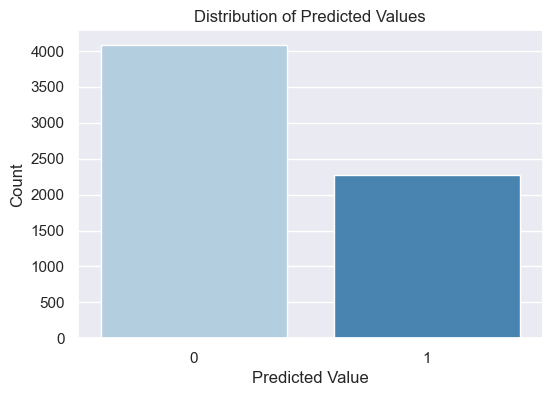

In [111]:
# Count plot of predicted values
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train_pred_final['predicted'], palette='Blues')

# Labels and title
plt.xlabel("Predicted Value")
plt.ylabel("Count")
plt.title("Distribution of Predicted Values")

In [112]:
# let's check the accuracy score
print("Accuracy score", accuracy_score(y_train_pred_final.Convert,y_train_pred_final.predicted))

Accuracy score 0.9184380412533459


### 0.4.13 Checking VIFs again

In [113]:
def calculate_vif(X_train):
    vif_df = pd.DataFrame()
    vif_df['Features'] = X_train.columns
    vif_df['Variance Inflation Factor'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif_df['Variance Inflation Factor'] = round(vif_df['Variance Inflation Factor'], 2)
    vif_df = vif_df.sort_values(by = 'Variance Inflation Factor', ascending =False)
    
    
print(vif_df)
calculate_vif(X_train[selected_features])

                                             Features       VIF
0                                               const  10824.14
81                     Last Notable Activity_Modified   2199.15
77                 Last Notable Activity_Email Opened   2048.70
85                     Last Notable Activity_SMS Sent   1730.04
83      Last Notable Activity_Page Visited on Website    324.75
48         What is your current occupation_Unemployed    275.89
49         What is your current occupation_Unemployes    242.30
82      Last Notable Activity_Olark Chat Conversation    189.81
75           Last Notable Activity_Email Link Clicked    181.20
50  What is your current occupation_Working Profes...     80.30
6                           Lead Origin_Lead Add Form     73.86
74                Last Notable Activity_Email Bounced     63.92
13                              Lead Source_Reference     58.29
87                 Last Notable Activity_Unsubscribed     51.33
86                  Last Notable Activit

In [128]:
def evaluate_model(y_true, y_predicted, print_score=False):
    """
    Evaluates a classification model and prints key performance metrics.

    Parameters:
    y_true (array-like): Actual target values.
    y_predicted (array-like): Predicted target values.
    print_score (bool): If True, prints the evaluation metrics.

    Returns:
    tuple: (Accuracy, Sensitivity (Recall), Specificity, Precision, False Positive Rate (FPR))
    """
    # Compute the confusion matrix
    confusion = confusion_matrix(y_true, y_predicted)
    
    # Extract TP, TN, FP, FN from the confusion matrix
    TP = confusion[1, 1]  # True Positives
    TN = confusion[0, 0]  # True Negatives
    FP = confusion[0, 1]  # False Positives
    FN = confusion[1, 0]  # False Negatives

    # Compute performance metrics
    accuracy_sc = accuracy_score(y_true, y_predicted)
    sensitivity_score = TP / float(TP + FN) if (TP + FN) != 0 else 0  # Recall
    specificity_score = TN / float(TN + FP) if (TN + FP) != 0 else 0
    precision_sc = precision_score(y_true, y_predicted)
    false_positive_rate = FP / float(FP + TN) if (FP + TN) != 0 else 0  # FPR Calculation

    # Print results if needed
    if print_score:
        print(f"Accuracy: {accuracy_sc:.4f}")
        print(f"Sensitivity (Recall): {sensitivity_score:.4f}")
        print(f"Specificity: {specificity_score:.4f}")
        print(f"Precision: {precision_sc:.4f}")
        print(f"False Positive Rate (FPR): {false_positive_rate:.4f}")

    return accuracy_sc, sensitivity_score, specificity_score, precision_sc, false_positive_rate

In [129]:
evaluate_model(y_train_pred_final.Convert, y_train_pred_final.predicted,print_score=True)

Accuracy: 0.9184
Sensitivity (Recall): 0.8645
Specificity: 0.9512
Precision: 0.9149
False Positive Rate (FPR): 0.0488


(0.9184380412533459,
 0.8645268862025844,
 0.951163967611336,
 0.9148654609616232,
 0.04883603238866397)

### 0.4.15 STEP 10 : PLOTTING THE ROC CURVE

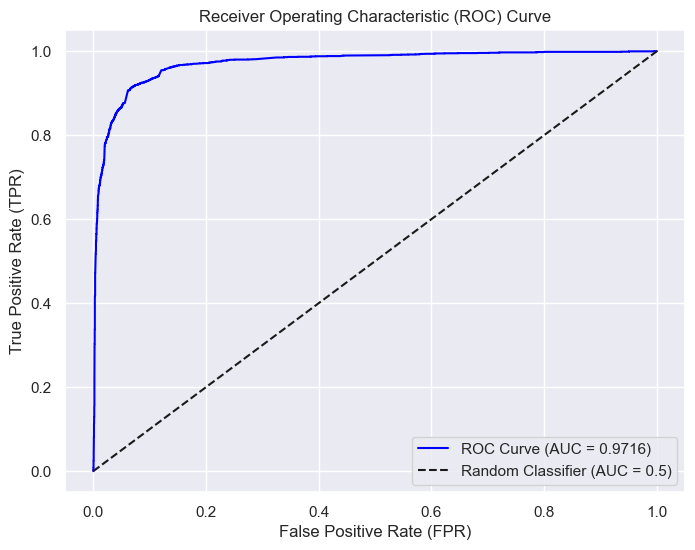

In [130]:
# Predict probabilities for the positive class (Converted = 1)
y_train_prob = logm2_fit.predict(X_train_sm)
# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_train, y_train_prob)
# Compute the AUC score
auc_score = roc_auc_score(y_train, y_train_prob)
# Plot the ROC curve
plt.figure(figsize=(8,6))

plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.4f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)') # Diagonal line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


### 0.4.16 STEP 11: CHOOSING THE OPTIMAL THRESHOLD

In [135]:
# Predicting Convert status with different probability cutoffs
for i in [float(x)/10 for x in range(10)]:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map (lambda x: 1 if x> i else 0)

                                                           
y_train_pred_final.head()


,Convert,Convert_Prob,Pros_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.978151,3563,1,1,1,1,1,1,1,1,1,1,1
1,0,0.002975,273,0,1,0,0,0,0,0,0,0,0,0
2,0,0.003322,1903,0,1,0,0,0,0,0,0,0,0,0
3,1,0.998001,4982,1,1,1,1,1,1,1,1,1,1,1
4,0,0.078056,3213,0,1,0,0,0,0,0,0,0,0,0


In [149]:
import pandas as pd

# Clear DataFrame before filling
df = pd.DataFrame(columns=['probability_score', 'accuracy_score', 
                           'sensitivity_score', 'specificity_score', 'precision_score'])

# Run loop once with unique probability cutoffs
for i in [float(x) / 10 for x in range(10)]:
    # Create predicted values based on probability threshold
    y_train_pred_final[i] = y_train_pred_final['Convert_Prob'].apply(lambda x: 1 if x > i else 0)

    # Call evaluate_model function and correctly handle return values
    accuracy_sc, sensitivity_sc, specificity_sc, precision_sc, false_positive_rate = evaluate_model(
        y_train_pred_final['Convert'], y_train_pred_final[i]
    )

    # Append results to DataFrame
    df = pd.concat([df, pd.DataFrame([[i, accuracy_sc, sensitivity_sc, specificity_sc, precision_sc]], 
                                      columns=df.columns)], ignore_index=True)

# Display the corrected DataFrame
print(df)


   probability_score  accuracy_score  sensitivity_score  specificity_score  \
0                0.0        0.377736           1.000000           0.000000   
1                0.1        0.845379           0.977491           0.765182   
2                0.2        0.897969           0.963318           0.858300   
3                0.3        0.910250           0.934556           0.895496   
4                0.4        0.923792           0.916215           0.928391   
5                0.5        0.918438           0.864527           0.951164   
6                0.6        0.916391           0.839100           0.963310   
7                0.7        0.909306           0.804919           0.972672   
8                0.8        0.886160           0.727386           0.982540   
9                0.9        0.869942           0.671530           0.990385   

   precision_score  
0         0.377736  
1         0.716468  
2         0.804946  
3         0.844444  
4         0.885933  
5         0.914

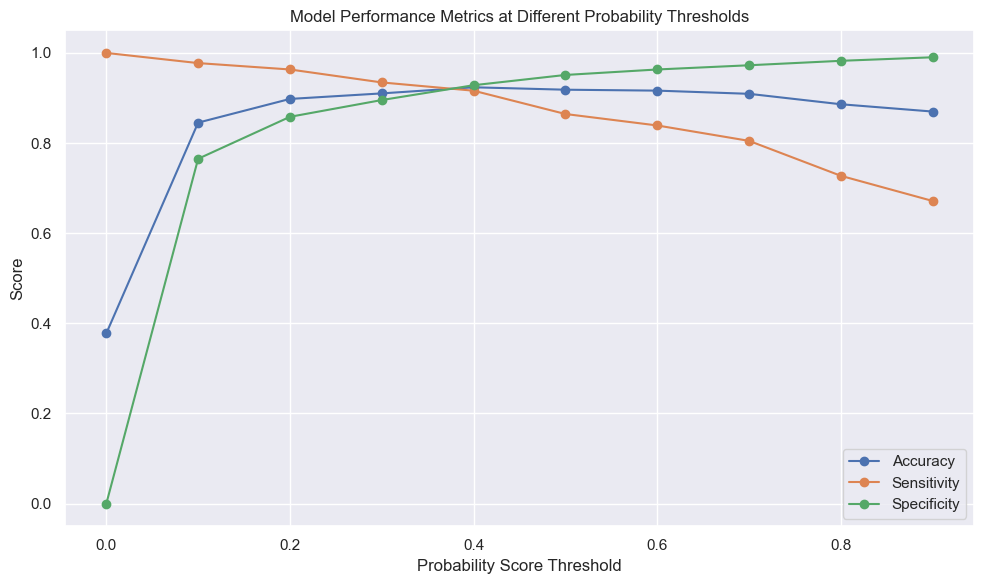

In [151]:
plt.figure(figsize=(10, 6))

# Ensure the columns exist in df before plotting
if {'probability_score', 'accuracy_score', 'sensitivity_score', 'specificity_score'}.issubset(df.columns):
    plt.plot(df['probability_score'], df['accuracy_score'], marker='o', linestyle='-', label='Accuracy')
    plt.plot(df['probability_score'], df['sensitivity_score'], marker='o', linestyle='-', label='Sensitivity')
    plt.plot(df['probability_score'], df['specificity_score'], marker='o', linestyle='-', label='Specificity')

    plt.xlabel('Probability Score Threshold')
    plt.ylabel('Score')
    plt.title('Model Performance Metrics at Different Probability Thresholds')

    plt.grid(True)
    plt.legend()
    plt.tight_layout()  # Adjust layout for better visibility
    plt.show()
else:
    print("One or more required columns are missing in df.")

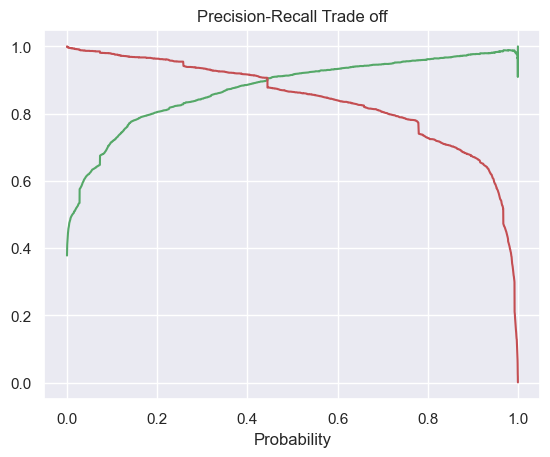

In [152]:
# Compute Precision-Recall values for different probability thresholds
p, r, thresholds = precision_recall_curve(y_train_pred_final.Convert,
                                          y_train_pred_final.Convert_Prob)
# Plot Precision vs. Thresholds
plt.plot(thresholds, p[:-1], "g-")
# Plot Recall vs. Thresholds
plt.plot(thresholds, r[:-1], "r-")
# Add labels and title
plt.xlabel("Probability")
plt.title("Precision-Recall Trade off")
# Display the plot
plt.show()

In [153]:
y_train_pred_final = y_train_pred_final.iloc[:, :3]
# Apply a probability threshold of 0.45 to classify leads as converted (1) or not converted (0)
y_train_pred_final['Convert_predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.45 else 0)
# Create a Lead Score by converting the probability into a percentage (scale of 0-100)
y_train_pred_final['Lead_Score'] = y_train_pred_final.Convert_Prob.map(lambda x: round(x*100))
# Display rows 10 to 14 of the updated DataFrame
y_train_pred_final[10:15]


,Convert,Convert_Prob,Pros_ID,Convert_predicted,Lead_Score
10,0,0.000397,1687,0,0
11,1,0.373854,4023,0,37
12,0,0.000567,530,0,0
13,0,0.001351,7088,0,0
14,0,0.500552,549,1,50


In [154]:
evaluate_model(y_train_pred_final.Convert, y_train_pred_final.Convert_predicted, print_score=True)

Accuracy: 0.9189
Sensitivity (Recall): 0.8770
Specificity: 0.9443
Precision: 0.9053
False Positive Rate (FPR): 0.0557


(0.9189104078097937,
 0.8770320967069613,
 0.944331983805668,
 0.9053356282271945,
 0.05566801619433198)

In [155]:
logm2 = sm.Logit(y_train, X_train_sm).fit(maxiter=200)


Optimization terminated successfully.
         Current function value: 0.208155
         Iterations 9


In [156]:
# Add a constant term to the test dataset for logistic regression model
X_test_sm = sm.add_constant(X_test[selected_features])
# Get the predicted probabilities on the test set using the trained model(logm2)
y_test_pred = logm2.predict(X_test_sm)
# Convert actual test labels into a DataFrame
y_test_df = pd.DataFrame(y_test)
# Convert predicted probabilities into a DataFrame
y_test_pred_df = pd.DataFrame(y_test_pred, columns=["Converting_Probability"])
# Add a unique identifier for each test instance (Prospect ID)
y_test_df['Prospect ID'] = y_test_df.index
# Combine actual test labels, predicted probabilities, and Prospect ID into one DataFrame
y_predicted_final = pd.concat([y_test_df.reset_index(drop=True),
y_test_pred_df.reset_index(drop=True)], axis=1)
# Apply a probability threshold of 0.45 to classify whether a lead converts (1) or not (0)
y_predicted_final['final_predicted'] = y_predicted_final.Converting_Probability.map(lambda x: 1 if x > 0.45 else 0)
# Generate a Lead Score by scaling the probability to a 0-100 range
y_predicted_final['Lead_Score'] = y_predicted_final.Converting_Probability.map(lambda x: round(x * 100))
# Display the first few rows of the final DataFrame
y_predicted_final.head()


,Converted,Prospect ID,Converting_Probability,final_predicted,Lead_Score
0,0,4870,0.000948,0,0
1,1,3315,0.929366,1,93
2,0,5166,0.027859,0,3
3,1,5210,0.992268,1,99
4,0,8447,0.001041,0,0


### 0.4.17 STEP 12 : FINAL MODEL

In [157]:
# Builds a logistic regression model and returns predicted values on training dataset
# when training data, test data and probability cutoff is give
def build_model_cutoff(X_train, y_train, X_test, y_test, cutoff=0.45):
    # Train model
    X_train_sm = sm.add_constant(X_train)
    logm = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
    res = logm.fit()

    # Predict on training data
    y_train_pred = res.predict(X_train_sm).values.reshape(-1)
    y_train_pred_final = pd.DataFrame({
        'Prospect ID': y_train.index,
        'Converted': y_train.values,
        'Convert_Probability': y_train_pred
    })
    
    # Applying cutoff
    y_train_pred_final['Convert_predicted'] = y_train_pred_final['Convert_Probability'].apply(lambda x: 1 if x > cutoff else 0)
    y_train_pred_final['Lead_Score'] = y_train_pred_final['Convert_Probability'].apply(lambda x: round(x * 100))
    
    print("------------------Result of Training Data-------------------")
    print(y_train_pred_final.head())

    # Predict on test data
    X_test_sm = sm.add_constant(X_test)
    y_test_pred = res.predict(X_test_sm)

    y_test_pred_final = pd.DataFrame({
        'Prospect ID': y_test.index,
        'Converted': y_test.values,
        'Convert_Probability': y_test_pred
    })
    
    # Applying cutoff
    y_test_pred_final['Convert_predicted'] = y_test_pred_final['Convert_Probability'].apply(lambda x: 1 if x > cutoff else 0)
    y_test_pred_final['Lead_Score'] = y_test_pred_final['Convert_Probability'].apply(lambda x: round(x * 100))
    
    y_test_pred_final.reset_index(inplace=True, drop=True)
    
    print("------------------Result of Test Data-------------------")
    print(y_test_pred_final.head())

    print("------------------Model Evaluation Metrics-------------------")
    evaluate_model(y_test_pred_final['Converted'], y_test_pred_final['Convert_predicted'], print_score=True)

    return y_test_pred_final

In [158]:
build_model_cutoff(X_train[selected_features], y_train,X_test[selected_features], y_test, cutoff=0.45)

------------------Result of Training Data-------------------
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0         3563          1             0.978151                  1          98
1          273          0             0.002975                  0           0
2         1903          0             0.003322                  0           0
3         4982          1             0.998001                  1         100
4         3213          0             0.078056                  0           8
------------------Result of Test Data-------------------
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0         4870          0             0.000948                  0           0
1         3315          1             0.929366                  1          93
2         5166          0             0.027859                  0           3
3         5210          1             0.992268                  1          99
4         8447          

,Prospect ID,Converted,Convert_Probability,Convert_predicted,Lead_Score
0,4870,0,0.000948,0,0
1,3315,1,0.929366,1,93
2,5166,0,0.027859,0,3
3,5210,1,0.992268,1,99
4,8447,0,0.001041,0,0
...,...,...,...,...,...
2718,8200,0,0.012539,0,1
2719,6943,0,0.004022,0,0
2720,5841,0,0.225670,0,23
2721,8145,0,0.000602,0,0


In [159]:
print("Features used in Final Model :", selected_features)
print("-----------------------Feature Importance--------------------")
print(logm2.params)

Features used in Final Model : Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Last Activity_Email Opened',
       'Last Activity_Other Activity', 'Last Activity_SMS Sent',
       'Specialization_Other Specialization', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested  in full time MBA',
       'Tags_Interested in other courses', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Not sure', 'Lead Quality_Worst'],
      dtype='object')
-----------------------Feature Importance--------------------
const                                       -2.482586
Do Not Email                                -0.604690
Total Time Spent on Website                  0.867382
Lead Origin_Landing Page Submission         -2.189548
Last Activity_Email Opened                   1.010444
Last Activity_Other Activity                 2.314292
Last Activity_SMS Sent       

0.4.18 FEATURE IMPORTANCE ANALYSIS AND CONCLUSION
### 0.5 Conclusion

0.5.1 ff Key Takeaways
• Tags & Lead Quality: Leads tagged as “Closed by Horizzon” (8.25) & “Lost to EINS” (8.43) have the strongest positive influence on conversion. Conversely, low lead quality (e.g., “Worst” -3.84) significantly reduces conversion chances.

• Engagement Matters: SMS interactions (Last Activity_SMS Sent: 1.85) improve conversion rates, while inactive leads (Switched Off: -2.50) are less likely to convert.
• Email Opt-outs: “Do Not Email” (-1.08) negatively impacts conversion, suggesting 
lower engagement levels


### 
0.5.2 ff Model Performan
ce
• High Accuracy (90.34%): The model correctly classifies most cases, ensuring reliabili
ty.
• Strong Specificity (92.32%): Effectively identifies non-converted le
ads.
• Good Recall (86.82%): Captures converted prospects well but has room for s ight
improv
ement.
• Low False Positive Rate (7.68%): Minimizes incorrect classifications of conversions.

#### 0.5.3 Final Verdict
The logistic regression model effectively predicts lead conversions, with strong accuracy and
specificity. Optimizing lead engagement strategies (e.g., SMS & Email) could further enhance recall and overall conversion rates. f

In [161]:
build_model_cutoff(X_train[selected_features], y_train,X_test[selected_features], y_test, cutoff=0.1)

------------------Result of Training Data-------------------
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0         3563          1             0.978151                  1          98
1          273          0             0.002975                  0           0
2         1903          0             0.003322                  0           0
3         4982          1             0.998001                  1         100
4         3213          0             0.078056                  0           8
------------------Result of Test Data-------------------
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0         4870          0             0.000948                  0           0
1         3315          1             0.929366                  1          93
2         5166          0             0.027859                  0           3
3         5210          1             0.992268                  1          99
4         8447          

,Prospect ID,Converted,Convert_Probability,Convert_predicted,Lead_Score
0,4870,0,0.000948,0,0
1,3315,1,0.929366,1,93
2,5166,0,0.027859,0,3
3,5210,1,0.992268,1,99
4,8447,0,0.001041,0,0
...,...,...,...,...,...
2718,8200,0,0.012539,0,1
2719,6943,0,0.004022,0,0
2720,5841,0,0.225670,1,23
2721,8145,0,0.000602,0,0


In [163]:
build_model_cutoff(X_train[selected_features], y_train,X_test[selected_features], y_test, cutoff=0.9)

------------------Result of Training Data-------------------
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0         3563          1             0.978151                  1          98
1          273          0             0.002975                  0           0
2         1903          0             0.003322                  0           0
3         4982          1             0.998001                  1         100
4         3213          0             0.078056                  0           8
------------------Result of Test Data-------------------
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0         4870          0             0.000948                  0           0
1         3315          1             0.929366                  1          93
2         5166          0             0.027859                  0           3
3         5210          1             0.992268                  1          99
4         8447          

,Prospect ID,Converted,Convert_Probability,Convert_predicted,Lead_Score
0,4870,0,0.000948,0,0
1,3315,1,0.929366,1,93
2,5166,0,0.027859,0,3
3,5210,1,0.992268,1,99
4,8447,0,0.001041,0,0
...,...,...,...,...,...
2718,8200,0,0.012539,0,1
2719,6943,0,0.004022,0,0
2720,5841,0,0.225670,0,23
2721,8145,0,0.000602,0,0
